# Time Series Modeling Storm Permit Data

###### Imports and Defaults

In [14]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from warnings import simplefilter
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

simplefilter("ignore")  # ignore warnings to clean up output cells

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

###### Bring in data

In [10]:
data = pd.read_csv('../data/districtsix.csv', 
                  index_col = 'date', 
                  parse_dates = ['date'])
data=data.sort_values(by='date')
data.head()

dist                                     type  \
date                                                        
2019-06-26     6               Building Residential - New   
2019-07-02     6               Building Residential - New   
2020-03-05     6  Building Residential Rehab Storm Damage   
2020-03-06     6  Building Residential Rehab Storm Damage   
2020-03-10     6         Building Demolition Storm Damage   

                                    subtype    cost            address  \
date                                                                     
2019-06-26          Single Family Residence  272951  1203C  LILLIAN ST   
2019-07-02          Single Family Residence  323531      907 S 12TH ST   
2020-03-05          Single Family Residence   50000   1506  RUSSELL ST   
2020-03-06          Single Family Residence   16000    903  RUSSELL ST   
2020-03-10  Demolition Permit - Residential    3500   1909  RUSSELL ST   

                                                      purpose        lat  \
date                                                                       
2019-06-26  parent parcel is zoned R6, contains 10,650 sf ...  36.173262   
2019-07-02  PLANS ATTACHED.  Construct single family resid...  36.164549   
2020-03-05  STORM DAMAGE. Rehab to include interior and ex...  36.174564   
2020-03-06  Roof damage due to tornado.\nHistoric to revie...  36.174038   
2020-03-10  to demolish existing storm damaged detached ga...  36.173853   

                  lon  
date                   
2019-06-26 -86.748776  
2019-07-02 -86.749846  
2020-03-05 -86.743692  
2020-03-06 -86.755780  
2020-03-10 -86.735982

## Create a time dummy

In [11]:
data['time'] = np.arange(len(data.index))
data.head(3)

dist                                     type  \
date                                                        
2019-06-26     6               Building Residential - New   
2019-07-02     6               Building Residential - New   
2020-03-05     6  Building Residential Rehab Storm Damage   

                            subtype    cost            address  \
date                                                             
2019-06-26  Single Family Residence  272951  1203C  LILLIAN ST   
2019-07-02  Single Family Residence  323531      907 S 12TH ST   
2020-03-05  Single Family Residence   50000   1506  RUSSELL ST   

                                                      purpose        lat  \
date                                                                       
2019-06-26  parent parcel is zoned R6, contains 10,650 sf ...  36.173262   
2019-07-02  PLANS ATTACHED.  Construct single family resid...  36.164549   
2020-03-05  STORM DAMAGE. Rehab to include interior and ex...  36.174564   

                  lon  time  
date                         
2019-06-26 -86.748776     0  
2019-07-02 -86.749846     1  
2020-03-05 -86.743692     2

Linear regression with the time dummy produces the model:  

`target` = `weight`*`time`+`bias`

The time dummy then lets us fit curves to time series in a *time plot* where `Time` forms the x-axis.

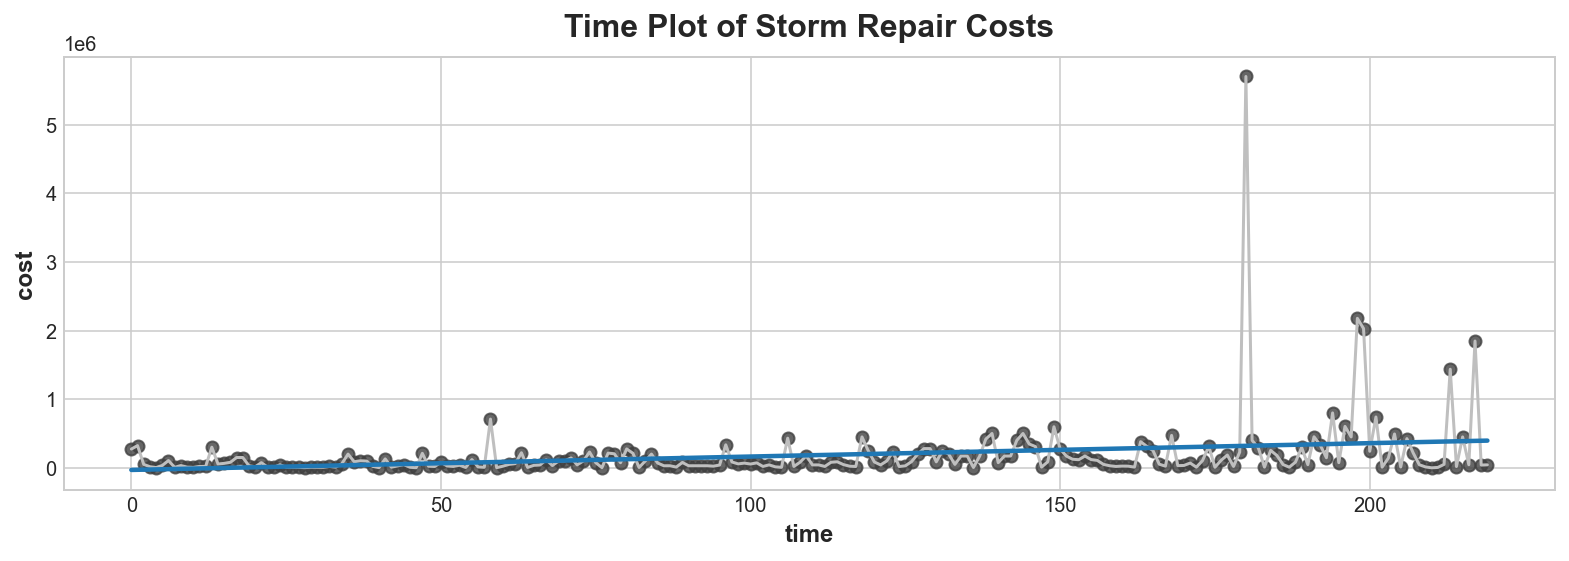

In [15]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time', 'cost', data=data, color='0.75')
ax = sns.regplot(x='time', y='cost', data=data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Storm Repair Costs');

It doesn't look like this is going to be enough data to group by so I'm going to look at the whole city again.

In [34]:
data = pd.read_csv('../data/stormpermits.csv', 
                   index_col = 'date',
                   parse_dates = ['date'])
data=data.sort_values(by='date')
data.head()

summer
date              
2019-02-06       1
2019-02-06       1
2019-02-07       1
2019-02-19       1
2019-03-07       1

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726 entries, 2019-02-06 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   summer  726 non-null    int64
dtypes: int64(1)
memory usage: 11.3 KB


In [36]:
byday = data.groupby(by = 'date').sum()

In [37]:
byday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 2019-02-06 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   summer  301 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [38]:
byday

summer
date              
2019-02-06       2
2019-02-07       1
2019-02-19       1
2019-03-07       1
2019-03-12       1
...            ...
2021-11-15       1
2021-11-18       1
2021-11-29       2
2021-11-30       1
2021-12-01       1

[301 rows x 1 columns]

Create a time dummy

In [39]:
df = byday.copy()

df['Time'] = np.arange(len(byday.index))

df.head()

summer  Time
date                    
2019-02-06       2     0
2019-02-07       1     1
2019-02-19       1     2
2019-03-07       1     3
2019-03-12       1     4

In [40]:
# Training data
X = df.loc[:, ['Time']] #features
y = df.loc[:, 'summer'] #target

# Train the model
model = LinearRegression()
model.fit(X,y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

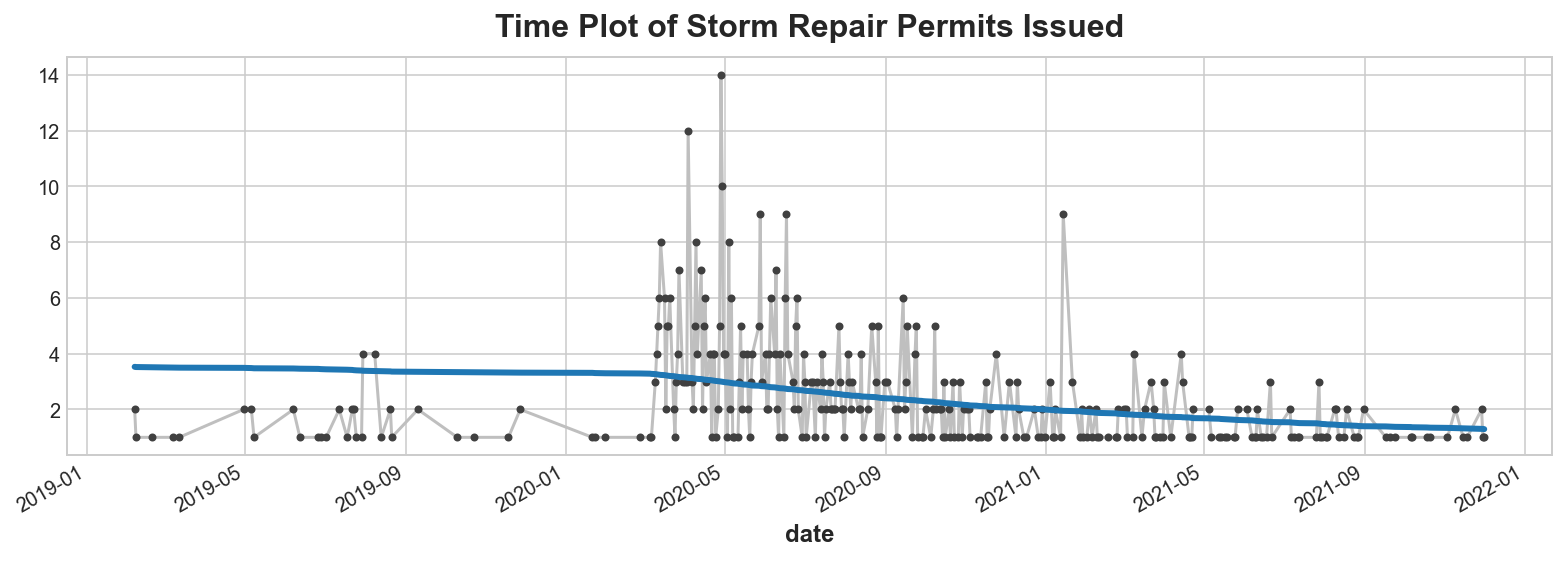

In [41]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Storm Repair Permits Issued');

## Check by Month

In [48]:
data = pd.read_csv('../data/stormpermits.csv')
data=data.sort_values(by='date').reset_index(drop=True)
data.head()

date  summer
0  2019-02-06T00:00:00.000       1
1  2019-02-06T00:00:00.000       1
2  2019-02-07T00:00:00.000       1
3  2019-02-19T00:00:00.000       1
4  2019-03-07T00:00:00.000       1

In [50]:
month = data['date'].str.split(pat = '-', expand = True)

In [51]:
month

0   1                2
0    2019  02  06T00:00:00.000
1    2019  02  06T00:00:00.000
2    2019  02  07T00:00:00.000
3    2019  02  19T00:00:00.000
4    2019  03  07T00:00:00.000
..    ...  ..              ...
721  2021  11  18T00:00:00.000
722  2021  11  29T00:00:00.000
723  2021  11  29T00:00:00.000
724  2021  11  30T00:00:00.000
725  2021  12  01T00:00:00.000

[726 rows x 3 columns]

In [53]:
data['year'] = month[0]
data['month'] = month[1]
daytime = month[2]

In [54]:
day = daytime.str.split(pat = 'T', expand = True)

In [55]:
day

0             1
0    06  00:00:00.000
1    06  00:00:00.000
2    07  00:00:00.000
3    19  00:00:00.000
4    07  00:00:00.000
..   ..           ...
721  18  00:00:00.000
722  29  00:00:00.000
723  29  00:00:00.000
724  30  00:00:00.000
725  01  00:00:00.000

[726 rows x 2 columns]

In [56]:
data['day'] = day[0]

In [58]:
data

date  summer  year month day
0    2019-02-06T00:00:00.000       1  2019    02  06
1    2019-02-06T00:00:00.000       1  2019    02  06
2    2019-02-07T00:00:00.000       1  2019    02  07
3    2019-02-19T00:00:00.000       1  2019    02  19
4    2019-03-07T00:00:00.000       1  2019    03  07
..                       ...     ...   ...   ...  ..
721  2021-11-18T00:00:00.000       1  2021    11  18
722  2021-11-29T00:00:00.000       1  2021    11  29
723  2021-11-29T00:00:00.000       1  2021    11  29
724  2021-11-30T00:00:00.000       1  2021    11  30
725  2021-12-01T00:00:00.000       1  2021    12  01

[726 rows x 5 columns]

In [63]:
bymonth = data[['summer', 'month']]

In [64]:
bymonth

summer month
0         1    02
1         1    02
2         1    02
3         1    02
4         1    03
..      ...   ...
721       1    11
722       1    11
723       1    11
724       1    11
725       1    12

[726 rows x 2 columns]

In [65]:
bymonth = bymonth.groupby(by = 'month').sum()

In [66]:
bymonth

summer
month        
01         27
02         18
03         96
04        130
05         83
06         98
07         76
08         65
09         42
10         41
11         31
12         19

In [67]:
df = bymonth.copy()

df['Time'] = np.arange(len(bymonth.index))

df.head()

summer  Time
month              
01         27     0
02         18     1
03         96     2
04        130     3
05         83     4

In [68]:
# Training data
X = df.loc[:, ['Time']] #features
y = df.loc[:, 'summer'] #target

# Train the model
model = LinearRegression()
model.fit(X,y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

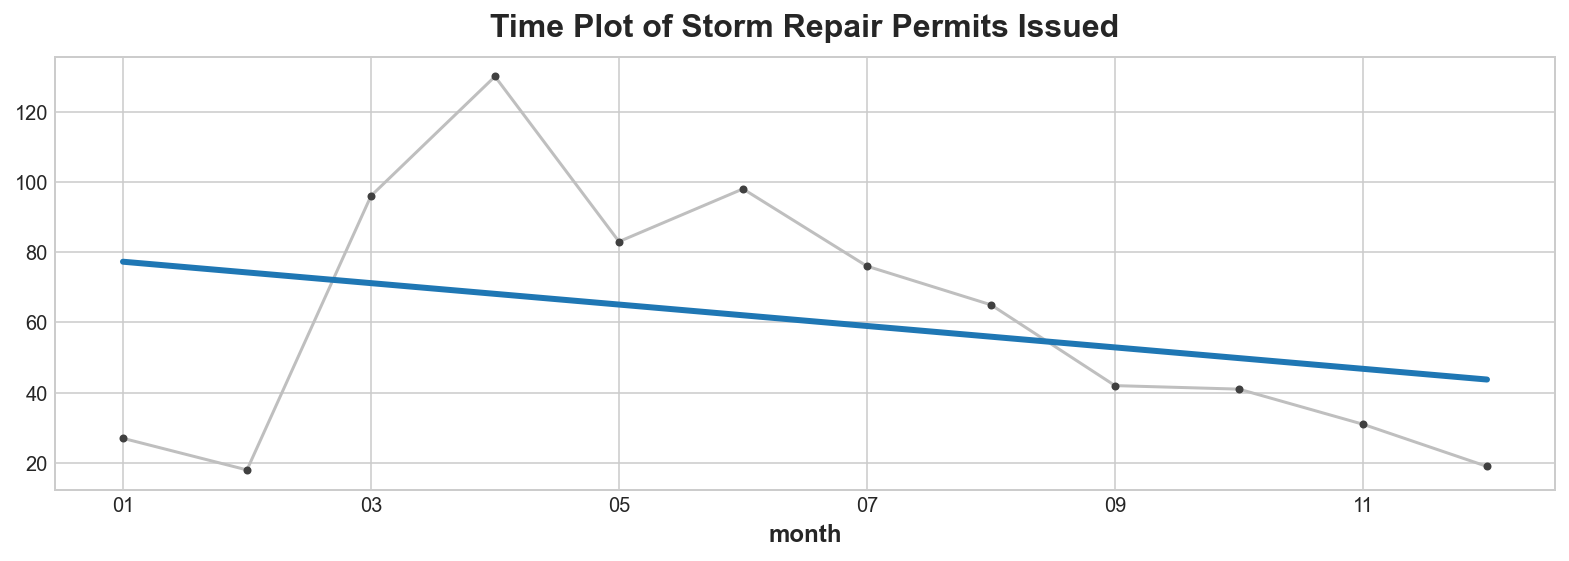

In [69]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Storm Repair Permits Issued');